<a href="https://colab.research.google.com/github/arpitac12/DigitalBhem/blob/main/Copy_of_Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME :FORD GO BIKE

CONTRIBUTION :INDIVIDUAL

TEAM MEMBER : ARPITA CHATRA

Summary:
The Ford GoBike Sharing EDA (Exploratory Data Analysis) project focuses on analyzing bike-sharing data to understand user behavior, bike usage patterns, and other important insights.
We explored various factors like trip duration, user type (subscriber or customer), gender, age, and usage across different weekdays and hours.
Data cleaning was done to remove missing or incorrect values, and new columns were created like user age and trip weekday to help in deeper analysis.
Visualization techniques such as bar graphs, pie charts, and heatmaps were used to find trends — like peak usage times, popular stations, and user demographics.


GITHUB LINK:

Conclusion:
From the analysis, we concluded that subscribers (regular members) form the majority of users compared to customers (casual users).
Most trips happen during weekday rush hours (morning and evening), which shows that bikes are mainly used for daily commutes.
Males use the service more than females, and the majority of users are between 25-40 years old.
Trip duration is longer for customers than for subscribers.
Overall, bike-sharing is heavily influenced by working patterns, age group, and subscription type, which helps Ford GoBike plan better service, offers, and bike placements.




In [ ]:
import pandas as pd
import folium
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving read.csv to read (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv('read.csv')
 # Make sure the file name matches
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,52:35.2,47:19.8,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,13:34.4,57:17.3,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,23:55.9,16:52.1,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,53:23.6,51:20.5,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,52:24.7,58:31.1,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


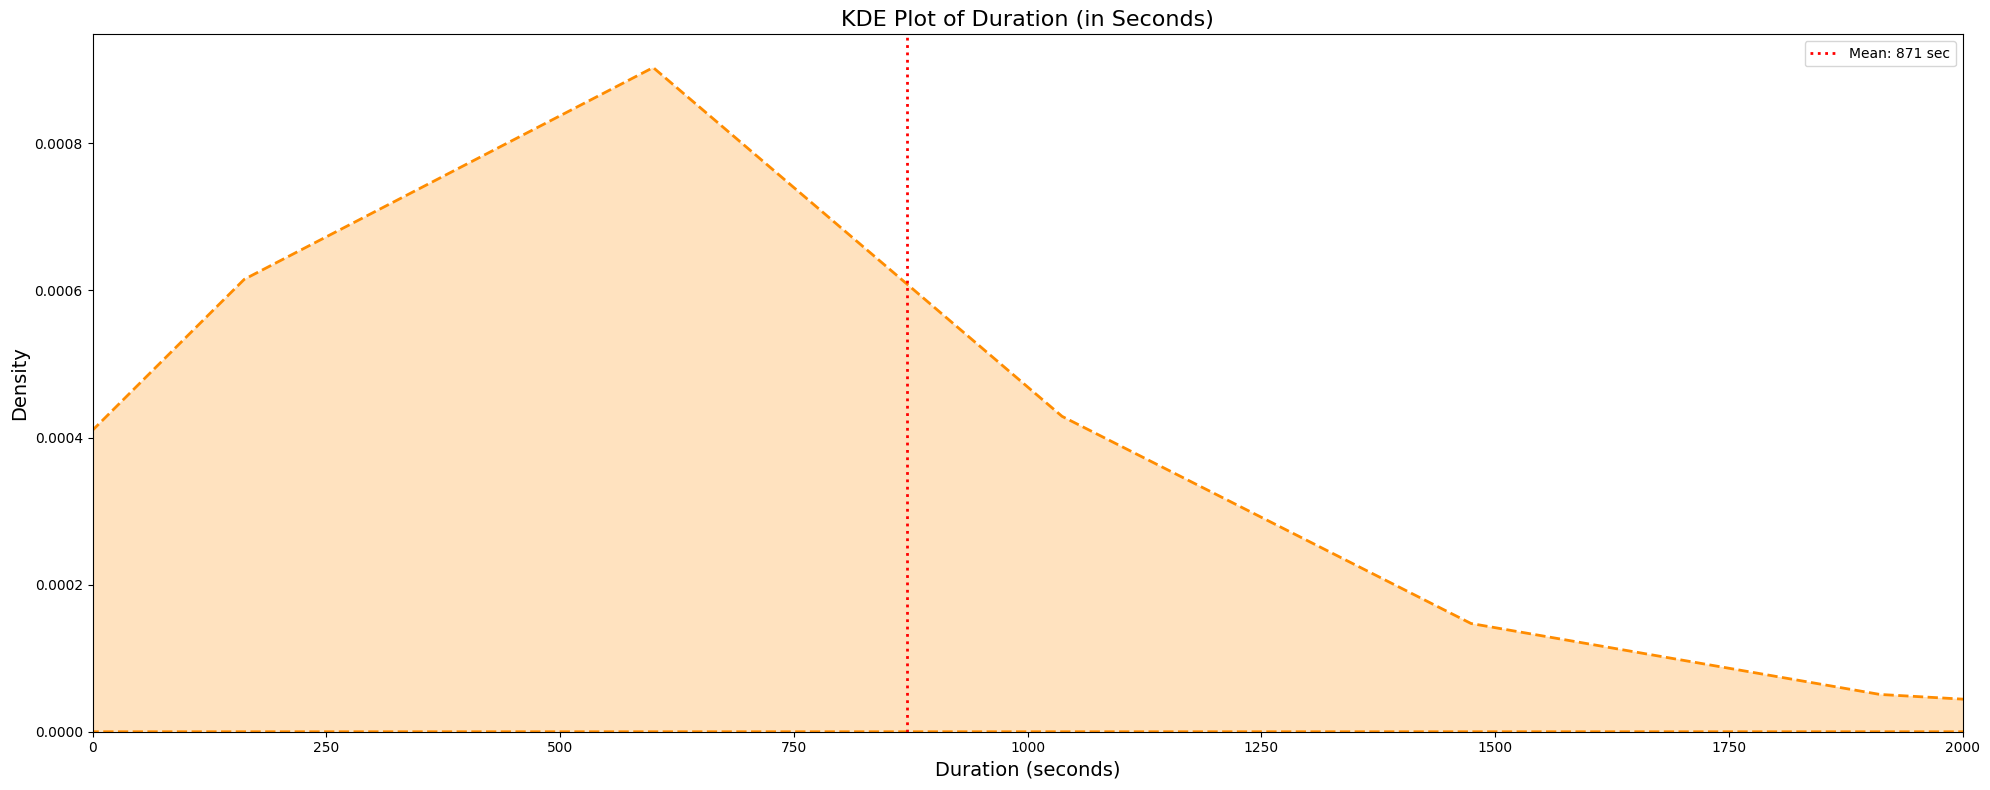

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(20, 8))
sns.kdeplot(df['duration_sec'], color='darkorange', linewidth=2, fill=True, linestyle='--')
plt.xlim(0, 2000)

# Add a mean line
mean_duration = np.mean(df['duration_sec'])
plt.axvline(mean_duration, color='red', linestyle=':', linewidth=2, label=f'Mean: {mean_duration:.0f} sec')

# Add labels and title
plt.title('KDE Plot of Duration (in Seconds)', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='start_hour', palette='viridis')
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()


<ipython-input-7-6b0022084e6a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour


DateParseError: hour must be in 0..23: 52:35.2, at position 0

<ipython-input-8-bede553c8aee>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], errors='coerce')
<ipython-input-8-bede553c8aee>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['start_hour'] = df_clean['start_time'].dt.hour
<ipython-input-8-bede553c8aee>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='start_hour', palette='viridis')


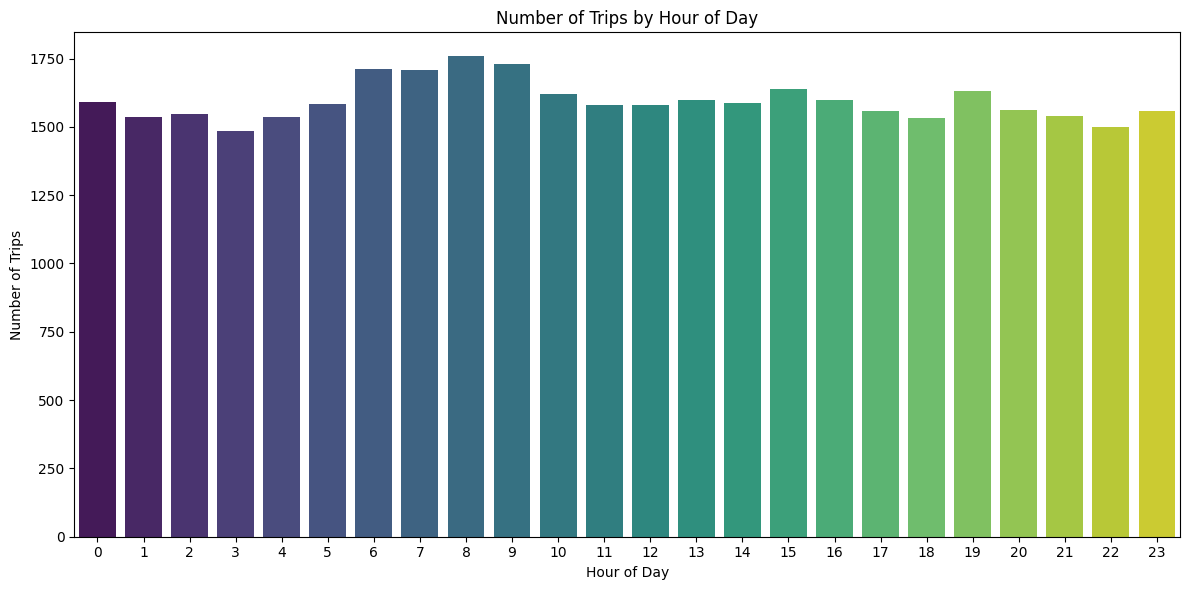

In [ ]:

df_clean = df.copy()


df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], errors='coerce')

df_clean = df_clean.dropna(subset=['start_time'])

df_clean['start_hour'] = df_clean['start_time'].dt.hour


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df_clean, x='start_hour', palette='viridis')
plt.title('Number of Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()


<ipython-input-9-c5b12e187ed3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_duration, x='user_type', y='duration_sec', palette='pastel')


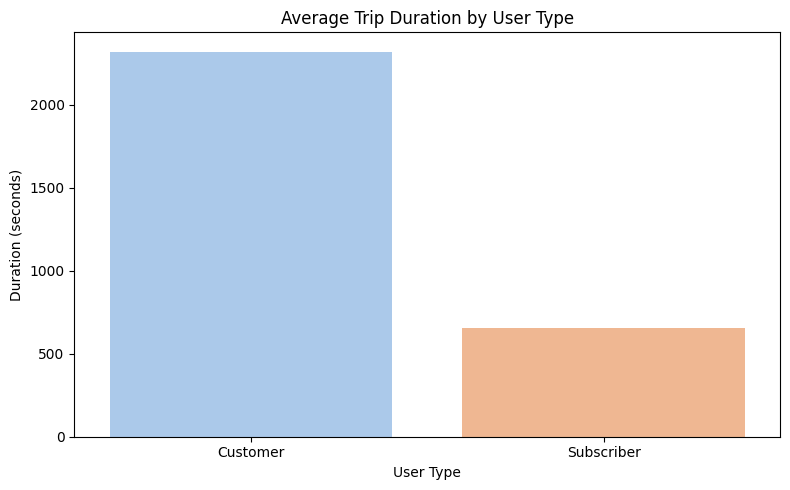

In [ ]:
avg_duration = df.groupby('user_type')['duration_sec'].mean().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_duration, x='user_type', y='duration_sec', palette='pastel')
plt.title('Average Trip Duration by User Type')
plt.ylabel('Duration (seconds)')
plt.xlabel('User Type')
plt.tight_layout()
plt.show()


In [ ]:
print("Total trips:", len(df))


Total trips: 94802


In [ ]:
df['duration_min'] = df['duration_sec'] / 60
print(df['duration_min'].describe())

count    94802.000000
mean        14.515599
std         42.509948
min          1.016667
25%          5.983333
50%          9.250000
75%         14.233333
max       1425.766667
Name: duration_min, dtype: float64


In [ ]:
import folium

# Drop rows with missing coordinates
df_map = df.dropna(subset=['start_station_latitude', 'start_station_longitude'])

# Get average location to center the map
center_lat = df_map['start_station_latitude'].mean()
center_lon = df_map['start_station_longitude'].mean()

# Create the map
bike_map = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# Add stations as markers
for _, row in df_map.iterrows():
    folium.Marker(
        location=[row['start_station_latitude'], row['start_station_longitude']],
        popup=row['start_station_name'],
        icon=folium.Icon(color='blue', icon='bicycle', prefix='fa')
    ).add_to(bike_map)

# Display map (Jupyter Notebook or Colab)
bike_map


Buffered data was truncated after reaching the output size limit.